K Bala Sai Manvitha - CS22B1030

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential,Model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist

In [3]:
# As PCA is unSupervised learning ignoring the labels
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [4]:
print(xTrain.shape)
print(xTest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# Normalizing the pixels
xTrain = xTrain.astype("float32")/255.0
xTest = xTest.astype("float32")/255.0

In [6]:
# Flattening the images for PCA
xTrainFlat = xTrain.reshape(xTrain.shape[0], -1)        # -1 for doing all the images
xTestFlat = xTest.reshape(xTest.shape[0], -1)

In [7]:
# reduced to 4 dimensional latent space
pca = PCA(n_components = 4)
xTrainPCA = pca.fit_transform(xTrainFlat)
xTestPCA = pca.fit_transform(xTestFlat)

In [8]:
# Reconstructing the images from reduced dimentinal data using inverse transform

xTrainPCA = pca.inverse_transform(xTrainPCA).reshape(-1, 28, 28)
xTestPCA = pca.inverse_transform(xTestPCA).reshape(-1, 28, 28)


Visualization for data before applying PCA and after applying PCA

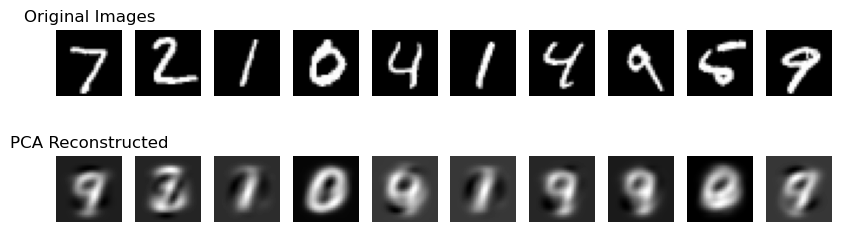

In [9]:
# Select 10 samples for visualization
num_samples = 10
fig, axes = plt.subplots(2, num_samples, figsize=(num_samples, 3))

for i in range(num_samples):
    axes[0, i].imshow(xTest[i], cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(xTestPCA[i], cmap="gray")
    axes[1, i].axis("off")

axes[0, 0].set_title("Original Images")
axes[1, 0].set_title("PCA Reconstructed")

plt.show()

AutoEncoder

In [10]:
autoencoder = Sequential([
    Flatten(input_shape=(28, 28)),   # Flatten input image
    Dense(4, activation='relu'),     # Encoder: Compress to 4D latent space
    Dense(784, activation='sigmoid'),# Decoder: Expand back to 28x28
    Reshape((28, 28))                # Reshape to original image dimensions
])

c:\Users\91898\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile Model
autoencoder.compile(optimizer='adam', loss='mse')

In [12]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │         3,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,060 (27.58 KB)

 Trainable params: 7,060 (27.58 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train AutoEncoder
autoencoder.fit(xTrain, xTrain, epochs=20, batch_size=256, shuffle=True, validation_data=(xTest, xTest))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1466 - val_loss: 0.0687
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0657 - val_loss: 0.0584
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0575 - val_loss: 0.0543
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0541 - val_loss: 0.0525
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0526 - val_loss: 0.0515
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0517 - val_loss: 0.0507
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0509 - val_loss: 0.0501
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0502 - val_loss: 0.0496
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0496 - val_loss: 0.0489
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0491 - val_loss: 0.0484
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0486 - val_loss: 0.0480
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [14]:
# Extract encoder part from the trained autoencoder
encoder = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[1].output)

# Get latent vectors
xTrainAE = encoder.predict(xTrain)
xTestAE = encoder.predict(xTest)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step


In [15]:
xTestAEreconstructed = autoencoder.predict(xTest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


In [20]:
# Ensure latent representations are 2D
xTestPCA = xTestPCA.reshape(xTestPCA.shape[0], -1)  # Should already be 2D, but ensuring
xTestAE = xTestAE.reshape(xTestAE.shape[0], -1)    # Flatten if it has extra dimensions

# Now apply t-SNE
tsnePCA = TSNE(n_components=2, random_state=42).fit_transform(xTestPCA)
tsneAE = TSNE(n_components=2, random_state=42).fit_transform(xTestAE)


In [21]:
# # Get encoded representations from Autoencoder
# x_autoencoder_latent = autoencoder.encoder(xTrainAE).numpy()

In [23]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
# # PCA t-SNE plot
# for i in range(10):
#     idx = (yTrain == i)
#     ax[0].scatter(tsnePCA[idx, 0], tsnePCA[idx, 1], color=colors[i], label=f'Class {i}', alpha=0.7)
# ax[0].set_title("PCA t-SNE Visualization")
# ax[0].legend()

# # Autoencoder t-SNE plot
# for i in range(10):
#     idx = (yTrain == i)
#     ax[1].scatter(tsneAE[idx, 0], tsneAE[idx, 1], color=colors[i], label=f'Class {i}', alpha=0.7)
# ax[1].set_title("AutoEncoder t-SNE Visualization")
# ax[1].legend()

# plt.show()

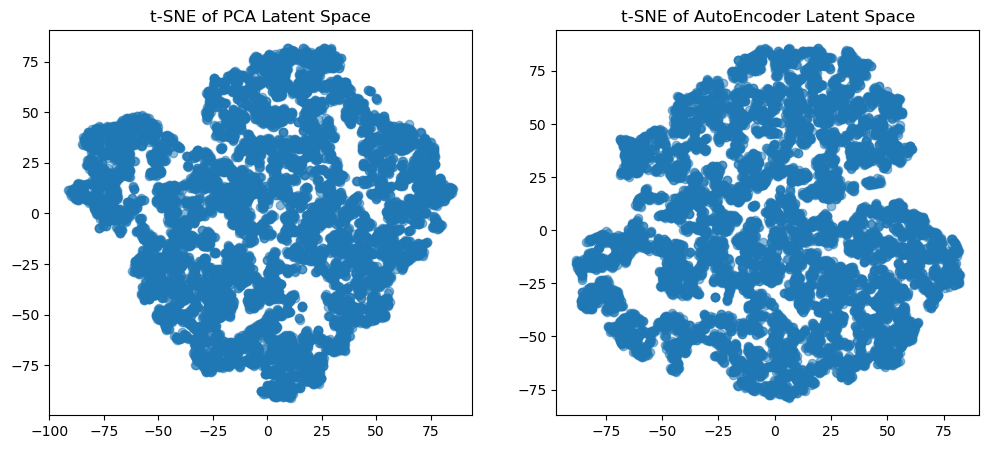

In [16]:
# Display t-SNE visualizations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(tsnePCA[:, 0], tsnePCA[:, 1], alpha=0.5)
ax[0].set_title("t-SNE of PCA Latent Space")

ax[1].scatter(tsneAE[:, 0], tsneAE[:, 1], alpha=0.5)
ax[1].set_title("t-SNE of AutoEncoder Latent Space")

plt.show()

In [ ]:
import seaborn as sns
tsne_pca = TSNE(n_components=2, random_state=42)
tsne_auto = TSNE(n_components=2, random_state=42)
tsne_pca_result = tsne_pca.fit_transform(xTrainPCA[:1000])
tsne_auto_result = tsne_auto.fit_transform(mnist_latent_vector[:1000])
labels = yTrain[:1000]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_pca_result[:, 0],y=tsne_pca_result[:, 1],hue=labels, palette="tab10", alpha=0.7)
plt.title("PCA t-SNE Visualization")
plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne_auto_result[:, 0],y=tsne_auto_result[:, 1],hue=labels, palette="tab10", alpha=0.7)
plt.title("AutoEncoder t-SNE Visualization")
plt.show()

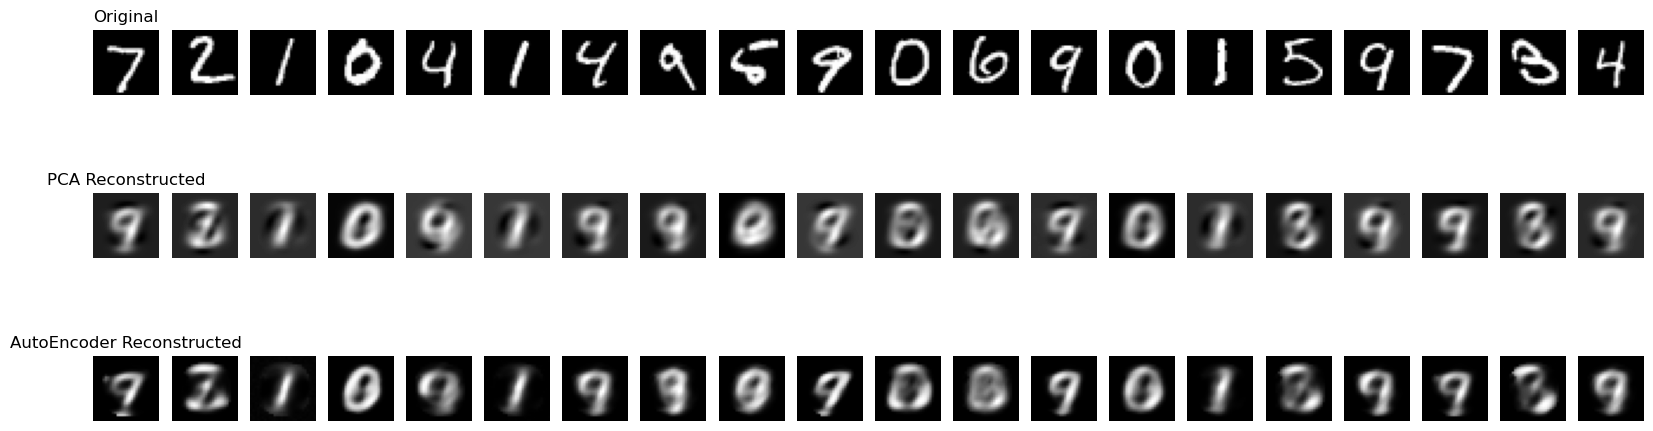

In [17]:
# Select 20 samples for reconstruction comparison
num_samples = 20
fig, axes = plt.subplots(3, num_samples, figsize=(num_samples, 6))

for i in range(num_samples):
    axes[0, i].imshow(xTest[i], cmap="gray")  # Original
    axes[0, i].axis("off")

    axes[1, i].imshow(xTestPCA[i].reshape(28, 28), cmap="gray")  # PCA Fixed
    axes[1, i].axis("off")

    axes[2, i].imshow(xTestAEreconstructed[i], cmap="gray")  # AutoEncoder
    axes[2, i].axis("off")

axes[0, 0].set_title("Original")
axes[1, 0].set_title("PCA Reconstructed")
axes[2, 0].set_title("AutoEncoder Reconstructed")

plt.show()

In [18]:
# Compute Compression Ratio
original_size = 28 * 28  # 784 pixels per image
compressed_size = 4  # 4 latent dimensions
compression_ratio = original_size / compressed_size

compression_ratio


196.0